In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('forestfires.csv')

X = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Ortalama Kare Hata (MSE): ", mse)
print("RMSE: ", rmse)
print("R^2 skoru: ", r2)

rf_params = {"max_depth": [3,5,7],
             "max_features": [2,4,6],
             "n_estimators": [100,200,300],
             "min_samples_split": [2,5,10]}

rf_cv_model = GridSearchCV(model, rf_params, cv=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print("Best params değerleri: ", rf_cv_model.best_params_)

rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                 max_features = 2,
                                 min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)
print("Tuned edilmiş model: ", rf_tuned)
y_pred = rf_tuned.predict(X_test)
print("Tune edilmiş modelin test RMSE hata değeri: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Ortalama Kare Hata (MSE):  11670.271881558545
RMSE:  108.02903258642347
R^2 skoru:  0.009967136929671327
Fitting 10 folds for each of 81 candidates, totalling 810 fits


c:\Users\ilayd\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params değerleri:  {'max_depth': 3, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 300}
Tuned edilmiş model:  RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)
Tune edilmiş modelin test RMSE hata değeri:  107.59834755896149


Değişkenlerin önem Dereceleri:  [7.26302765e+00 2.44268006e+01 6.74804420e+00 8.34192585e+00
 2.55439398e+01 1.67575544e+01 1.09077719e+01 1.09355532e-02]


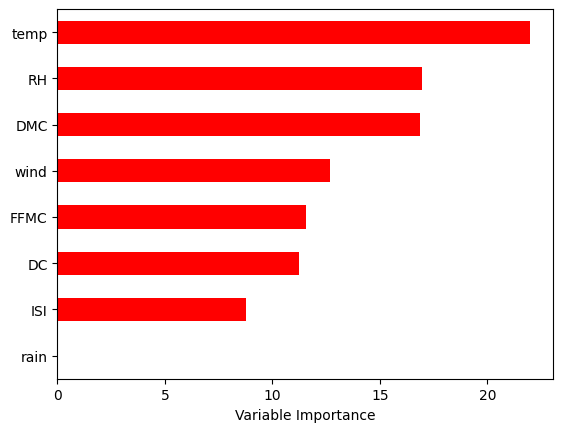

In [2]:
importances = model.feature_importances_*100
print("Değişkenlerin önem Dereceleri: ", importances)

Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )
                
plt.xlabel('Variable Importance')
plt.gca().legend_ = None